In [78]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt

In [79]:
#PATH ALLOCATION
data_dir=os.path.join('fdata')
classes=os.listdir(data_dir)
classes
#data.class_names

['duplicate', 'real']

In [80]:
from numpy import *
data=tf.keras.utils.image_dataset_from_directory('fdata',batch_size=2)
data

Found 10 files belonging to 2 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [81]:
#--------PREPROCESSING DATA----------#
data=data.map(lambda x,y:(x/255,y))    
scaled=data.as_numpy_iterator()
batch=scaled.next()

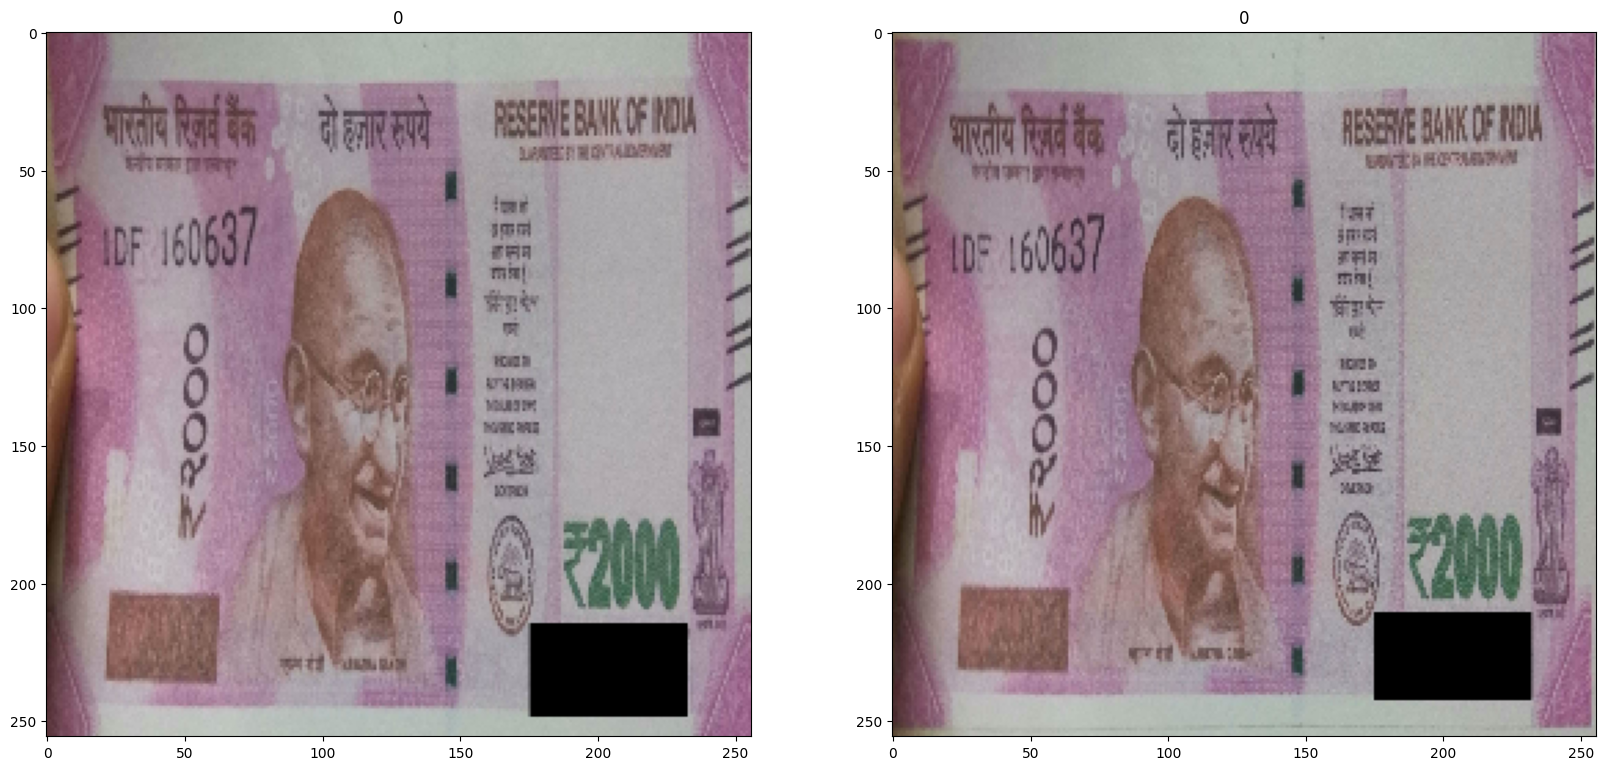

In [83]:
fig,ax=plt.subplots(ncols=2,figsize=(20,20))
ax=ax.flatten()
for i,j in enumerate(batch[0][:]):
    ax[i].imshow(j)    #already in minimal scaled range
    ax[i].title.set_text(batch[1][i])

In [84]:
#splitting the dataSet
print(len(data))
train=int(0.7*len(data)) #train--->70%
val=int(0.2*len(data))  #test---->20%
test=int(0.1*len(data))   #validation----->10%
print(train,test,val)


5
3 0 1


In [85]:

#shuffle dataset
data=data.shuffle(10000,seed=12)

#taking data
train_ds=data.take(train)
val_ds=data.skip(train).take(val)
test_ds=data.skip(test+val).take(test)

In [86]:
#MODEL BULIDING
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten,Dropout

In [87]:
model=Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [88]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [89]:
history=model.fit(train_ds,epochs=10,validation_data=val_ds)

Epoch 1/10
3/3 [==============================] - 3s 517ms/step - loss: 1.1896 - accuracy: 0.3333 - val_loss: 0.5507 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 1s 365ms/step - loss: 0.7381 - accuracy: 0.5000 - val_loss: 0.6968 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 1s 357ms/step - loss: 0.6589 - accuracy: 0.6667 - val_loss: 0.5510 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 1s 349ms/step - loss: 0.7115 - accuracy: 0.6667 - val_loss: 0.7163 - val_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 1s 352ms/step - loss: 0.7074 - accuracy: 0.5000 - val_loss: 0.8416 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 1s 329ms/step - loss: 0.6363 - accuracy: 0.6667 - val_loss: 0.6370 - val_accuracy: 0.5000
Epoch 7/10
3/3 [==============================] - 1s 346ms/step - loss: 0.7346 - accuracy: 0.3333 - val_loss: 0.6684 - val_accuracy: 0.5000
Epoch 8/10
3/3 [

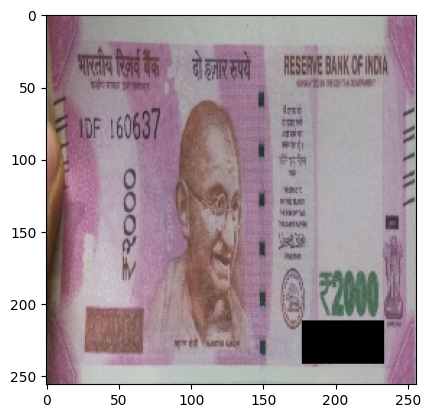

1/1 [==============================] - 0s 226ms/step
[[0.40404823]]


In [90]:
#unseen prediction
img=plt.imread('fake.jpg')
plt.imshow(img)

#resize according to layers
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int)) #adjusted according to RGB b/w 0 to 1
plt.show()

#optimize the new image
resize=resize/255
#expand your image array
img=expand_dims(resize,0)

#prediction
pred=model.predict(img)
print(pred)

In [91]:
#since it is a binary classification

if pred[0]>0.5:
    print("real")
else:
    print("fake")

fake
